## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [13]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#print tensorflow version
import tensorflow as tf
print(tf.__version__)

2.13.0


In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [15]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [17]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [18]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [19]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [20]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [24]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50
)

Epoch 1/50
2/2 [==============================] - 11s 5s/step - loss: 5.4603 - accuracy: 0.3594 - val_loss: 5.0394 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 5s 4s/step - loss: 4.8043 - accuracy: 0.3438 - val_loss: 7.3635 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 5s 4s/step - loss: 5.9676 - accuracy: 0.3906 - val_loss: 5.6982 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 5s 4s/step - loss: 3.3907 - accuracy: 0.3594 - val_loss: 2.1208 - val_accuracy: 0.4828
Epoch 5/50
2/2 [==============================] - 5s 4s/step - loss: 2.4770 - accuracy: 0.5625 - val_loss: 3.1523 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 5s 4s/step - loss: 2.2447 - accuracy: 0.5156 - val_loss: 1.9730 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 5s 4s/step - loss: 1.3508 - accuracy: 0.5000 - val_loss: 4.1381 - val_accuracy: 0.3276
Epoch 8/50
2/2 [========================

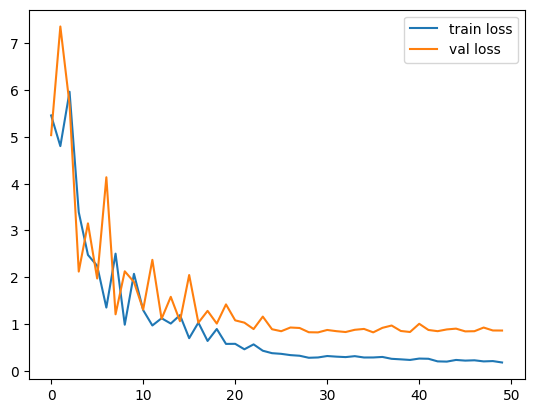

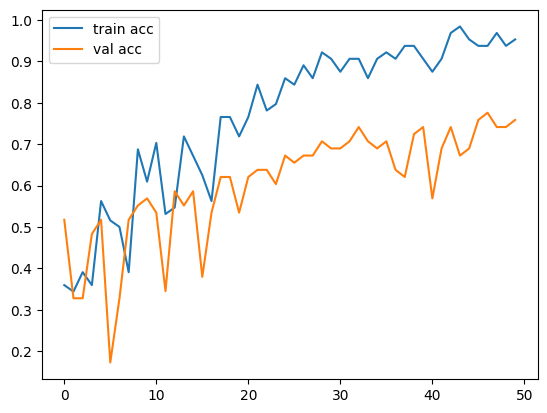

<Figure size 640x480 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

c:\Users\Subhang Mokkarala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:

y_pred = model.predict(test_set)


2/2 [==============================] - 4s 1s/step


In [29]:
y_pred

array([[9.37902570e-01, 3.85240801e-02, 2.35733148e-02],
       [1.67935751e-02, 1.67450234e-01, 8.15756202e-01],
       [4.54157144e-02, 1.55574195e-02, 9.39026892e-01],
       [1.06156571e-02, 9.65190887e-01, 2.41934378e-02],
       [4.32936437e-02, 7.28284657e-01, 2.28421658e-01],
       [1.29746469e-02, 3.20512452e-03, 9.83820200e-01],
       [5.70038617e-01, 1.97959095e-02, 4.10165459e-01],
       [1.46615067e-02, 9.53740478e-01, 3.15980427e-02],
       [6.67758510e-02, 5.82956433e-01, 3.50267738e-01],
       [2.49282748e-01, 7.17428863e-01, 3.32883932e-02],
       [6.70508221e-02, 5.01775801e-01, 4.31173325e-01],
       [1.89969484e-02, 9.79538262e-01, 1.46473933e-03],
       [1.26413554e-01, 8.34604800e-01, 3.89816463e-02],
       [1.62509282e-03, 9.44593787e-01, 5.37810549e-02],
       [7.72830751e-03, 2.18131140e-01, 7.74140477e-01],
       [3.00898403e-01, 3.50074023e-01, 3.49027604e-01],
       [2.48648375e-02, 7.78114617e-01, 1.97020561e-01],
       [1.36111259e-01, 7.08988

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_resnet50.h5')

In [34]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1